# The Forbes Billionaires List dataset provides extensive data on the world's wealthiest individuals, allowing for thorough Exploratory Data Analysis (EDA) of their profiles and net worth. 

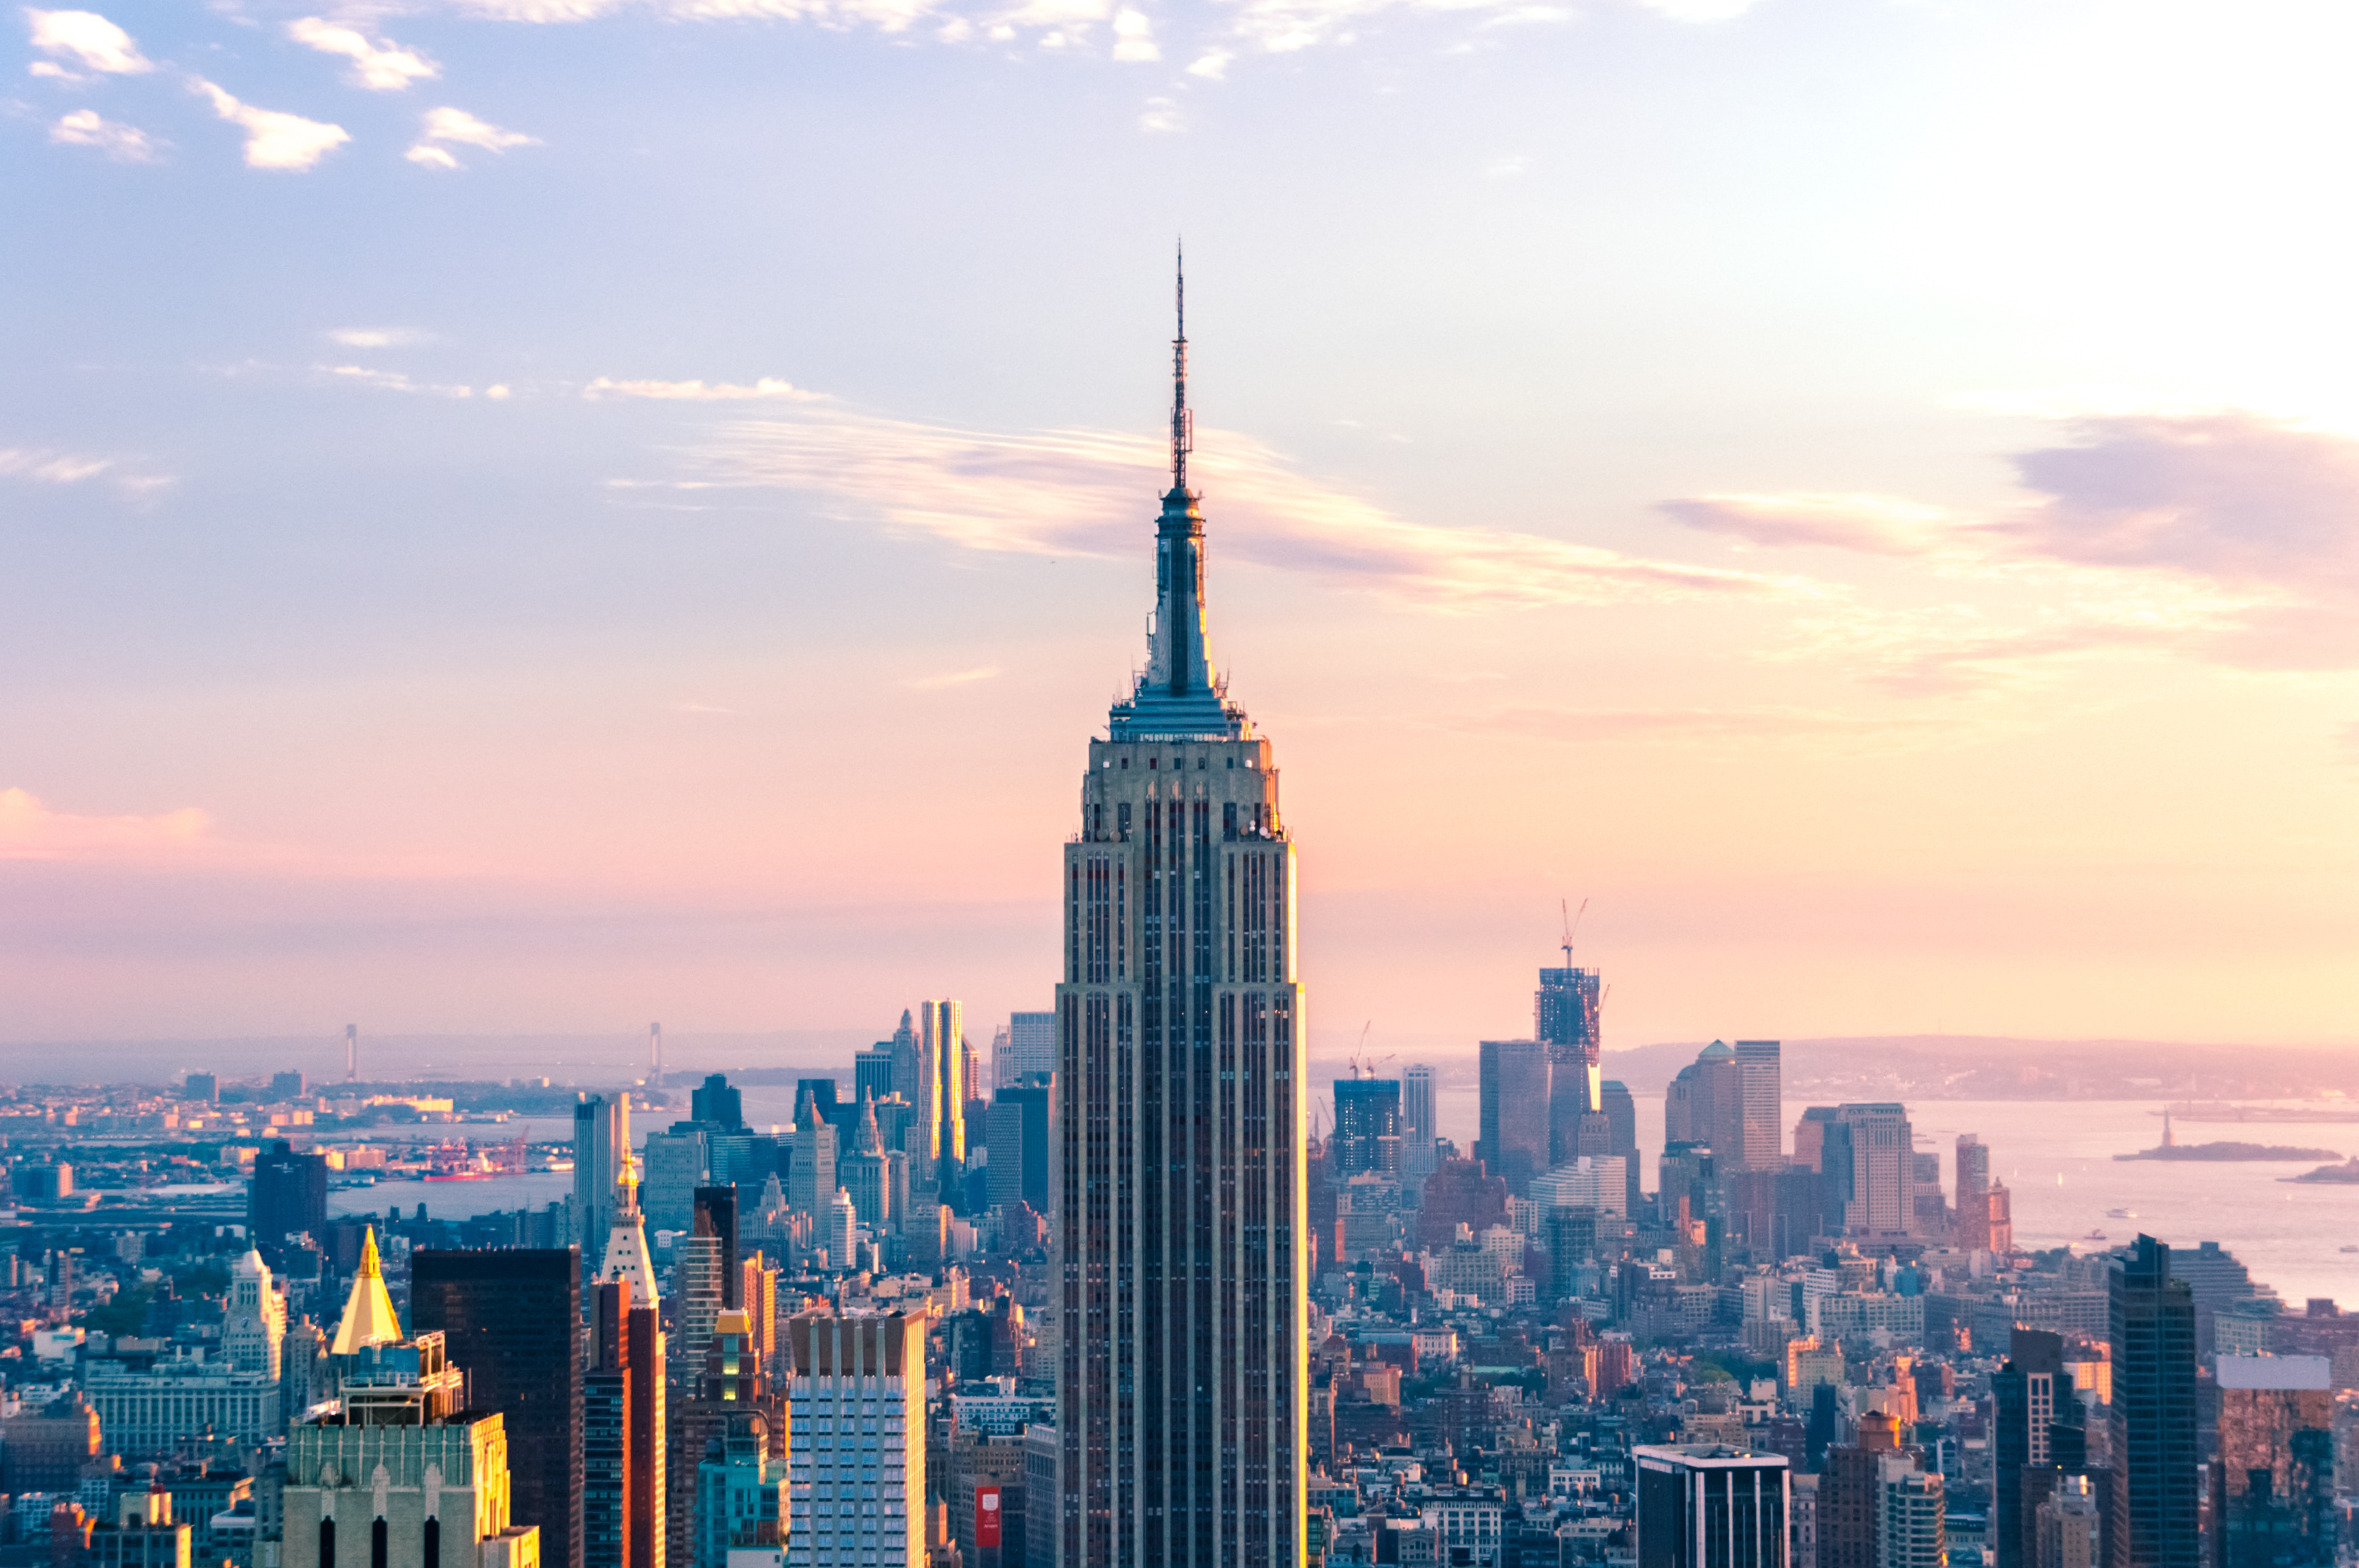
<em>Photo by <a href="https://unsplash.com/@cobblepot?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kit Suman</a> on <a href="https://unsplash.com/photos/WQwtk_t4oJI?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  </em>

## Step 1: Loading the dataset and importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_excel("forbes_billionaire_list_cleaned.xlsx")

## Step 2: Overview of the Data

In [2]:
df.head()

rank                      name  net_worth (in billion $)   age  \
0     1  Bernard Arnault & family                     211.0  74.0   
1     2                 Elon Musk                     180.0  51.0   
2     3                Jeff Bezos                     114.0  59.0   
3     4             Larry Ellison                     107.0  78.0   
4     5            Warren Buffett                     106.0  92.0   

  country / territory              source               industry  
0              France                LVMH       Fashion & Retail  
1       United States       Tesla, SpaceX             Automotive  
2       United States              Amazon             Technology  
3       United States              Oracle             Technology  
4       United States  Berkshire Hathaway  Finance & Investments

In [3]:
# Rename the columns 'net_worth' and 'country' for simplicity.
df = df.rename(columns={'net_worth (in billion $)': 'net_worth', 'country / territory': 'country'})

In [4]:
df.head()

rank                      name  net_worth   age        country  \
0     1  Bernard Arnault & family      211.0  74.0         France   
1     2                 Elon Musk      180.0  51.0  United States   
2     3                Jeff Bezos      114.0  59.0  United States   
3     4             Larry Ellison      107.0  78.0  United States   
4     5            Warren Buffett      106.0  92.0  United States   

               source               industry  
0                LVMH       Fashion & Retail  
1       Tesla, SpaceX             Automotive  
2              Amazon             Technology  
3              Oracle             Technology  
4  Berkshire Hathaway  Finance & Investments

In [5]:
df.dtypes

rank           int64
name          object
net_worth    float64
age          float64
country       object
source        object
industry      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       2655 non-null   int64  
 1   name       2655 non-null   object 
 2   net_worth  2655 non-null   float64
 3   age        2588 non-null   float64
 4   country    2655 non-null   object 
 5   source     2655 non-null   object 
 6   industry   2655 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 145.3+ KB


### Dealing with missing data

In [7]:
df.isnull().sum()

rank          0
name          0
net_worth     0
age          67
country       0
source        0
industry      0
dtype: int64

In [8]:
# Dropping the missing values
df = df.dropna(subset=['age'])

In [9]:
df.isnull().sum()

rank         0
name         0
net_worth    0
age          0
country      0
source       0
industry     0
dtype: int64

### Dealing with duplicate entries

In [10]:
duplicates = df[df.duplicated(keep=False)]
duplicates

rank                          name  net_worth   age        country  \
2543  2540           Lu Yonghua & family        1.0  59.0          China   
2545  2540                   Scott Smith        1.0  73.0  United States   
2550  2540                     Ma Xiuhui        1.0  52.0          China   
2553  2540           Lu Yonghua & family        1.0  59.0          China   
2558  2540                 Apoorva Mehta        1.0  36.0         Canada   
2561  2540                     Ma Xiuhui        1.0  52.0          China   
2566  2540             George Sakellaris        1.0  76.0  United States   
2568  2540  Vera Rechulski Santo Domingo        1.0  74.0         Brazil   
2573  2540  Vera Rechulski Santo Domingo        1.0  74.0         Brazil   
2584  2540                   Tyler Perry        1.0  53.0  United States   
2589  2540                   Tyler Perry        1.0  53.0  United States   
2592  2540                 Stanley Motta        1.0  77.0         Panama   
2597  2540                 Stanley Motta        1.0  77.0         Panama   
2600  2540       Fulvio Montipò & family        1.0  78.0          Italy   
2605  2540       Fulvio Montipò & family        1.0  78.0          Italy   
2608  2540              Andrei Molchanov        1.0  51.0         Russia   
2614  2540              Andrei Molchanov        1.0  51.0         Russia   
2617  2540                Ulrike Meister        1.0  56.0        Germany   
2622  2540                Ulrike Meister        1.0  56.0        Germany   
2633  2540                 Apoorva Mehta        1.0  36.0         Canada   
2638  2540                  Neerja Sethi        1.0  68.0  United States   
2640  2540     Eddy Kusnadi Sariaatmadja        1.0  69.0      Indonesia   
2645  2540     Eddy Kusnadi Sariaatmadja        1.0  69.0      Indonesia   
2647  2540             George Sakellaris        1.0  76.0  United States   
2652  2540                   Scott Smith        1.0  73.0  United States   
2654  2540                  Neerja Sethi        1.0  68.0  United States   

                          source                    industry  
2543                 Electronics                  Technology  
2545             Cloud computing                  Technology  
2550                LED lighting               Manufacturing  
2553                 Electronics                  Technology  
2558    Grocery delivery service                  Technology  
2561                LED lighting               Manufacturing  
2566             Energy services                      Energy  
2568                        Beer             Food & Beverage  
2573                        Beer             Food & Beverage  
2584          Movies, television       Media & Entertainment  
2589          Movies, television       Media & Entertainment  
2592                     Finance       Finance & Investments  
2597                     Finance       Finance & Investments  
2600             Hydraulic pumps               Manufacturing  
2605             Hydraulic pumps               Manufacturing  
2608      Construction materials  Construction & Engineering  
2614      Construction materials  Construction & Engineering  
2617                  Appliances               Manufacturing  
2622                  Appliances               Manufacturing  
2633    Grocery delivery service                  Technology  
2638  IT consulting, outsourcing                  Technology  
2640                 Media, tech       Media & Entertainment  
2645                 Media, tech       Media & Entertainment  
2647             Energy services                      Energy  
2652             Cloud computing                  Technology  
2654  IT consulting, outsourcing                  Technology

In [11]:
df = df.drop_duplicates()

In [12]:
unique_names_count = df['name'].nunique()
unique_country_count = df['country'].nunique()
unique_sources_of_income = df['source'].nunique()
unique_industries = df['industry'].nunique()
print("Number of unique names:", unique_names_count)
print("Number of unique countries:", unique_country_count)
print("Number of unique sources of income:", unique_sources_of_income)
print("Number of unique industries:", unique_industries)

Number of unique names: 2573
Number of unique countries: 77
Number of unique sources of income: 893
Number of unique industries: 18


In [13]:
df.describe()

rank    net_worth          age
count  2575.000000  2575.000000  2575.000000
mean   1279.875728     4.679262    65.139029
std     740.114437     9.942446    13.258623
min       1.000000     1.000000    18.000000
25%     636.000000     1.500000    56.000000
50%    1272.000000     2.400000    65.000000
75%    1905.000000     4.300000    75.000000
max    2540.000000   211.000000   101.000000

#### The Forbes Billionaires have a wide age range, from 18 to 101, with a mean age of 65. The richest billionaire has a net worth of 211 billion, while the "poorest" has only 1 billion.

In [14]:
# Find the youngest billionaires
youngest_billionaire_data = df[df['age'] == df['age'].min()]
youngest_billionaire_data

rank                  name  net_worth   age country     source  \
827   818  Clemente Del Vecchio        3.5  18.0   Italy  Eyeglases   

             industry  
827  Fashion & Retail

After a quick google search we can find that Clemente Del Vecchio, one of Leonardo Del Vecchio's children, who was only 18 at the time of his father's death, inherited a 12.5% stake in Vecchio's holding company Delfin, based in Luxembourg, as per Forbes. After inheriting his stake in his father's fortune in 2022, Clemente became the world's youngest billionaire at the age of just 18.

Under Leonardo's leadership, the eyewear giant acquired Sunglass Hut, Ray-Ban and Oakley and grew to make glasses for virtually every brand including Bulgari and Chanel. As per *The Sun*, the world's youngest billionaire, Clemente holds a low profile and does not have any direct involvement in his father's companies. 

Source: https://www.indiatimes.com/worth/news/18-year-old-clemente-del-vecchio-worlds-youngest-billionaire-607286.html

In [15]:
# Find the oldest billionaires
oldest_billionaire_data = df[df['age'] == df['age'].max()]
oldest_billionaire_data

rank           name  net_worth    age        country     source  \
2143  2133  George Joseph        1.3  101.0  United States  Insurance   

                   industry  
2143  Finance & Investments

After a quick google search we can find that Mercury General, an insurance provider generating annual revenues of 3.5 billion, was established by George Joseph. Commencing its journey in 1962, Mercury General was founded with 2 million in capital and targeted cost-effective offers for drivers considered safer than the norm. 

George Joseph, having experienced the challenges of the Great Depression, served as a flight navigator in World War II. Graduating in 1949 from Harvard, where he majored in mathematics and physics, Joseph holds a 34% stake in the publicly-traded insurance company. Notably, he holds the distinction of being America's most senior billionaire. 

Source: https://www.forbes.com/profile/george-joseph/?sh=79baa1214d54

##  Step 3: Visualizations

### Top 10 richest people in the world

In [16]:
fig = px.bar(df.head(10), x='name', y='net_worth', title='Top 10 richest people in the world', color='name',)
fig.update_yaxes(title="Net Worth in Billions")
fig.update_xaxes(title="Name")
fig.show()

#### Upon examining the dataset, it is evident that four out of the top ten wealthiest individuals,  Jeff Bezos, Larry Ellison, Bill Gates and Steve Ballmer, work in the technology industry.

### A Scatter Plot Analysis

In [17]:
fig = px.scatter(df, x='name', y='net_worth', title='Net Worth Distribution of Billionaires')
fig.update_layout(width=1000, height=600) 
fig.show()

#### It appears that there is a sudden increase in net worth.

### Global Billionaire Landscape: Wealth Distribution across Industries

In [18]:
fig = px.scatter(df, x='name', y='net_worth', color='industry', title='Wealthiest individual in each industry')
fig.update_layout(width=1000, height=600) 
fig.show()

#### We can zoom in and identify the wealthiest individuals in each industry.

### Top 10 Countries Leading the Billionaire Landscape

In [19]:
# Top 10 Countries with the most number of billinores
top_countries = df['country'].value_counts().head(10)
print(top_countries)

country
United States     735
China             476
India             169
Germany           107
Russia            105
Hong Kong          64
Italy              62
Canada             61
Brazil             50
United Kingdom     50
Name: count, dtype: int64


In [20]:
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Count']
fig = px.bar(top_countries_df, x='Country', y='Count', title='Top 10 Countries with Most Billionaires', color='Country')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

### Countries with the fewest number of billionaires

In [21]:
countries = df['country'].value_counts().tail(20)
print(countries)

country
Oman                    2
Georgia                 2
Estonia                 1
Barbados                1
St. Kitts and Nevis     1
Armenia                 1
Tanzania                1
Bangladesh              1
Macau                   1
Algeria                 1
Nepal                   1
Venezuela               1
Zimbabwe                1
Guernsey                1
Liechtenstein           1
Iceland                 1
Eswatini (Swaziland)    1
Belize                  1
Portugal                1
Panama                  1
Name: count, dtype: int64


#### We have 4 countries in Africa, 6 in Asia, 7 in Europe, 4 in North America, and 1 in South America.

### Leading Industries by Billionaire Presence: Top 10 Industries with the Highest Count

In [22]:
# Top 10 industried with the most number of billinores
top_industries = df['industry'].value_counts().head(10)
print(top_industries)

industry
Finance & Investments    363
Manufacturing            316
Technology               306
Fashion & Retail         259
Food & Beverage          201
Healthcare               196
Real Estate              191
Diversified              182
Energy                    97
Media & Entertainment     87
Name: count, dtype: int64


In [23]:
top_industries_df = top_industries.reset_index()
top_industries_df.columns = ['Industry', 'Count']

fig = px.bar(top_industries_df, x='Industry', y='Count', title='Top 10 industries with the most billionaires', color='Industry')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### A significant number of billionaires have accumulated their wealth through finance and investment endeavors.

### Exploring the Rarest Billionaire-Favored Industries: Top 10 Industries with the Fewest Billionaires

In [24]:
# Top 10 industried with the least number of billinores
industries = df['industry'].value_counts().tail(10)
industries_df = industries.reset_index()
industries_df.columns = ['Industry', 'Count']

fig = px.bar(industries_df, x='Industry', y='Count', title='Top 10 Industries with the least number of Billionaires', color='Industry')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

### Industry Distribution of Billionaires: A Pie Chart Analysis

In [25]:
# Pie chart for the number of billionaires per industry
industry_counts = df['industry'].value_counts()

fig = px.pie(industry_counts, names=industry_counts.index, values=industry_counts.values, title='Breakdown of number of Billionaires by Industry')
fig.update_layout(width=1000, height=1000)
fig.show()

### Top 10 Industries by Total Net Worth: A Visual Analysis of Wealth Distribution

In [26]:
# Top 10 industries with the highest net worth
top_industries = df.groupby('industry')['net_worth'].sum().sort_values(ascending=False).head(10)

top_industries_df = top_industries.reset_index()
top_industries_df.columns = ['Industry', 'Total Net Worth']

fig = px.bar(top_industries_df, x='Industry', y='Total Net Worth', title='Top 10 Industries by Total Net Worth', color='Industry')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Top Indian Billionaires: Wealth and Profile Overview

In [27]:
indian_billionaires = df[df['country'] == 'India']
indian_billionaires.head()

rank              name  net_worth   age country  \
8      9     Mukesh Ambani       83.4  65.0   India   
23    24      Gautam Adani       47.2  60.0   India   
54    55        Shiv Nadar       25.6  77.0   India   
67    68  Cyrus Poonawalla       22.6  81.0   India   
92    93    Lakshmi Mittal       17.7  72.0   India   

                         source         industry  
8                   Diversified      Diversified  
23  Infrastructure, commodities      Diversified  
54            Software services       Technology  
67                     Vaccines       Healthcare  
92                        Steel  Metals & Mining

In [28]:
indian_billionaires.size

1183

In [29]:
indian_billionaires.describe()

rank   net_worth         age
count   169.000000  169.000000  169.000000
mean   1387.627219    3.992899   68.236686
std     699.405604    7.923718   11.243128
min       9.000000    1.000000   36.000000
25%     905.000000    1.400000   63.000000
50%    1434.000000    2.100000   68.000000
75%    2020.000000    3.200000   75.000000
max    2540.000000   83.400000   99.000000

#### The youngest Indian billionaire is 36 years old while the oldest is 99 years old, with an average age of 68.

In [30]:
youngest_billionaire_india = indian_billionaires[indian_billionaires['age'] == indian_billionaires['age'].min()]
youngest_billionaire_india

rank           name  net_worth   age country              source  \
2415  2405  Nikhil Kamath        1.1  36.0   India  Financial services   

                   industry  
2415  Finance & Investments

Nikhil Kamath (born September 5, 1986) is an Indian entrepreneur. He is the co-founder of Zerodha, a retail stockbroker and True Beacon, an asset management company.

Source: https://en.wikipedia.org/wiki/Nikhil_Kamath

In [31]:
oldest_billionaire_india = indian_billionaires[indian_billionaires['age'] == indian_billionaires['age'].max()]
oldest_billionaire_india

rank             name  net_worth   age country       source     industry
2322  2259  Keshub Mahindra        1.2  99.0   India  Diversified  Diversified

Keshub Mahindra was chairman emeritus of the $16.4 billion (revenue) Mumbai-listed conglomerate Mahindra & Mahindra. He died in April 2023 at age 99. He joined his father's company in 1947, became chairman in 1963 and stepped down in 2012, ceding the spot to his billionaire nephew, Anand Mahindra.

Source: https://www.forbes.com/profile/keshub-mahindra/?sh=1ce7bfd721f2

### Top 10 Wealthiest Individuals in India by Net Worth

In [32]:
fig = px.bar(indian_billionaires.head(10), x='name', y='net_worth', title='Top 10 wealthiest people in India', color='name',)
fig.update_yaxes(title="Net Worth in Billions")
fig.update_xaxes(title="Name")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### Mukesh Ambani, the richest person in India, is the ninth richest person in the world.

### Charting the Leading Industries with the Most Billionaires in India

In [33]:
# Top industries with most Billionaires in India
top_industries_india = indian_billionaires['industry'].value_counts().head(10)
top_industries_india_df = top_industries_india.reset_index()
top_industries_india_df.columns = ['Industry', 'Count']

fig = px.bar(top_industries_india_df, x='Industry', y='Count', title='Top 10 Industries with Most Billionaires in India', color='Industry')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### Most Indian Billionaires made their fortune from the Manufacturing industry

### Leading Sources of Wealth Among India's Billionaires: A Top 10 Overview

In [34]:
# Top sources of income with most Billionaires in India
top_industries_india = indian_billionaires['source'].value_counts().head(10)
top_industries_india_df = top_industries_india.reset_index()
top_industries_india_df.columns = ['Source', 'Count']

fig = px.bar(top_industries_india_df, x='Source', y='Count', title='Top 10 sources of income with Most Billionaires in India', color='Source')
fig.update_layout(xaxis_tickangle=-45)
fig.show()